In [1]:
import pandas as pd 



In [2]:
df=pd.read_csv("C:\\Users\\USER\\Downloads\\BigMart.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.info()
df.drop(df[['Item_Visibility','Outlet_Establishment_Year','Outlet_Location_Type']], axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.isna().sum()

Item_Identifier         0
Item_Weight          1463
Item_Fat_Content        0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size          2410
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

In [5]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace=True)
df.isna().sum()

C:\Users\USER\AppData\Local\Temp\ipykernel_1676\281438095.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_1676\281438095.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Item_Identifier      0
Item_Weight          0
Item_Fat_Content     0
Item_Type            0
Item_MRP             0
Outlet_Identifier    0
Outlet_Size          0
Outlet_Type          0
Item_Outlet_Sales    0
dtype: int64

exploring the data types   


In [6]:
numarical=df.select_dtypes(include=['int64','float64']).columns.to_list()
numarical

['Item_Weight', 'Item_MRP', 'Item_Outlet_Sales']

In [7]:
catagorical=df.select_dtypes(include=['object']).columns.to_list()
catagorical

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Type']

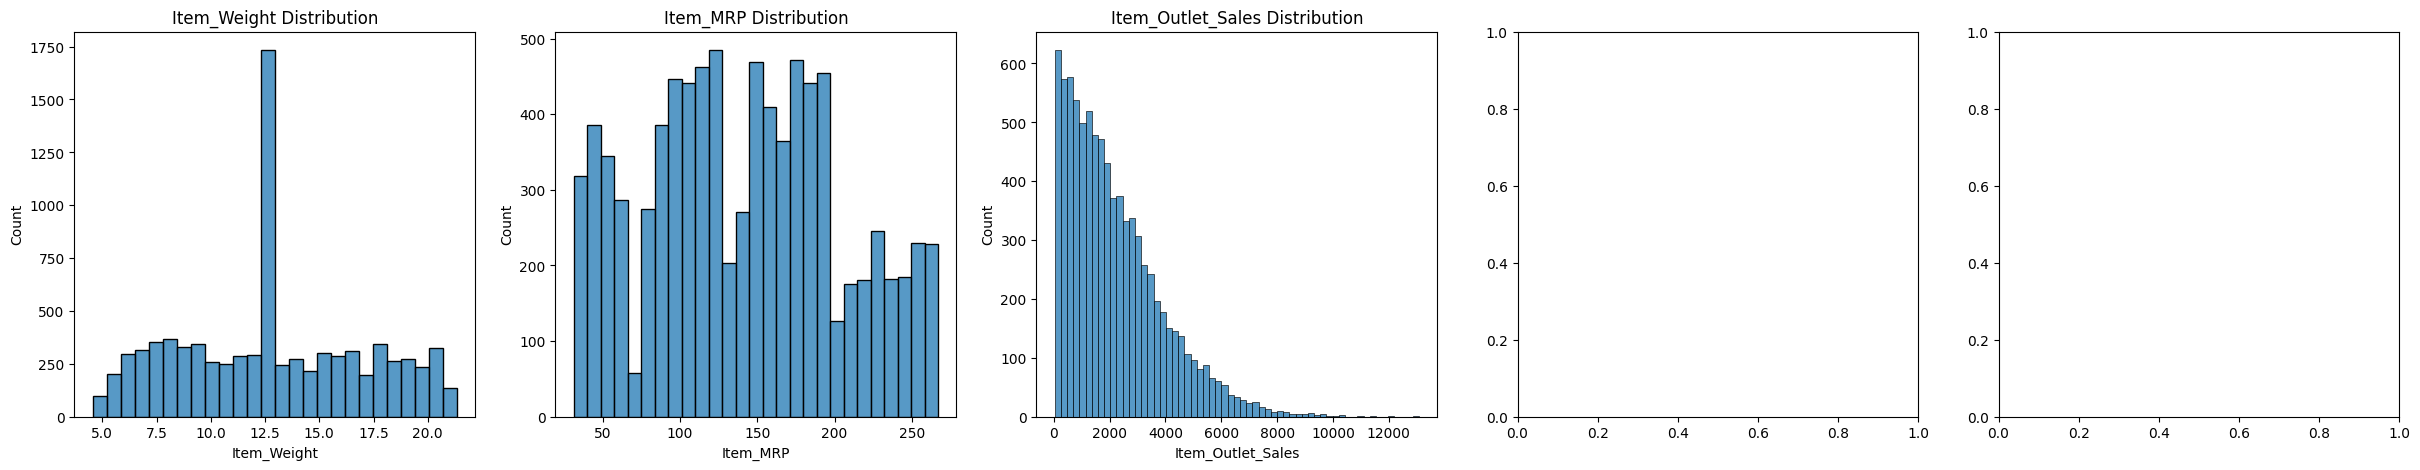

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
_,ax=plt.subplots(nrows=1,ncols=5,figsize=(30,5))
for i,col in enumerate(numarical):
    sns.histplot(df[col],kde=False,ax=ax[i])
    ax[i].set_title(f"{col} Distribution")

   


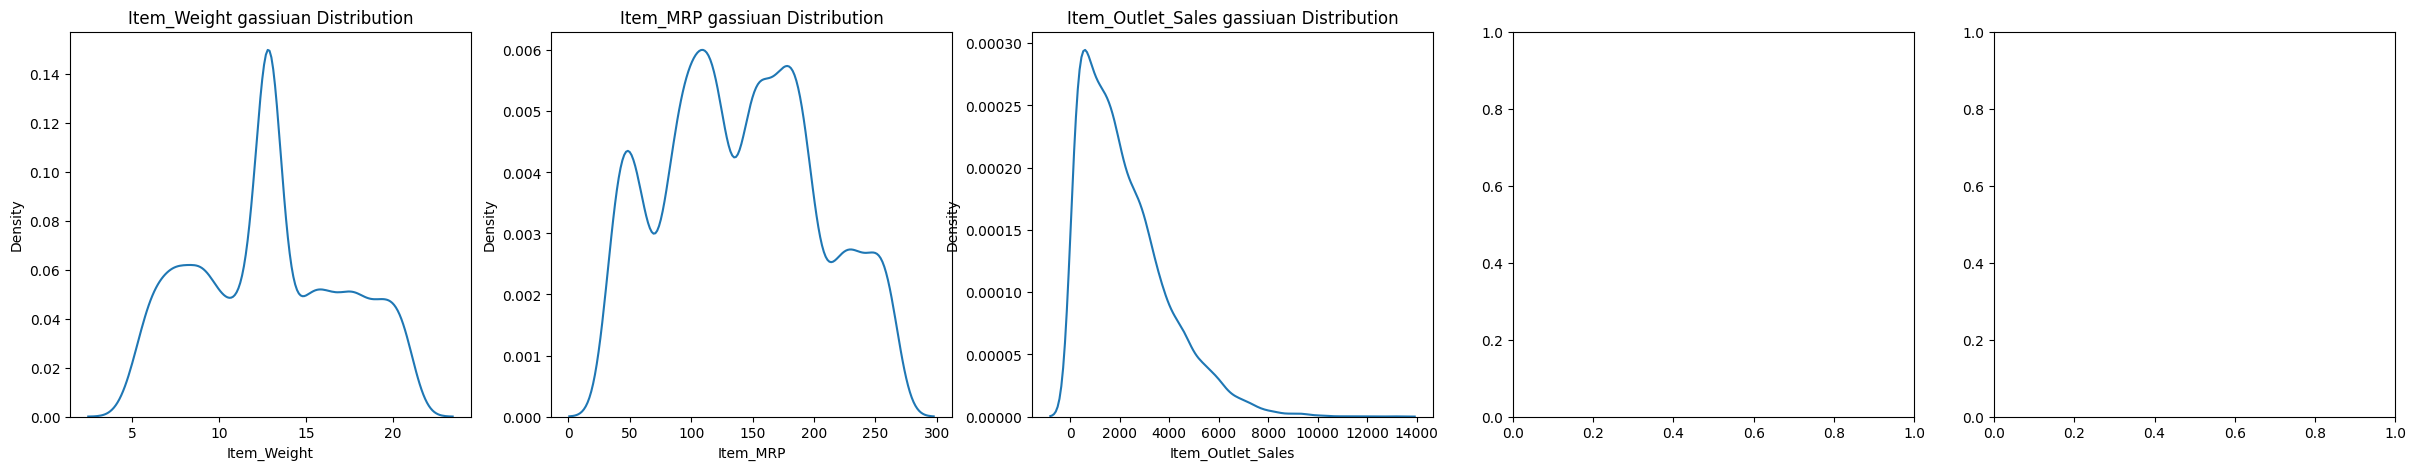

In [9]:
_,ax=plt.subplots(nrows=1,ncols=5,figsize=(30,5))
for i,col in enumerate(numarical):
    sns.kdeplot(df[col],ax=ax[i])
    ax[i].set_title(f"{col} gassiuan Distribution")

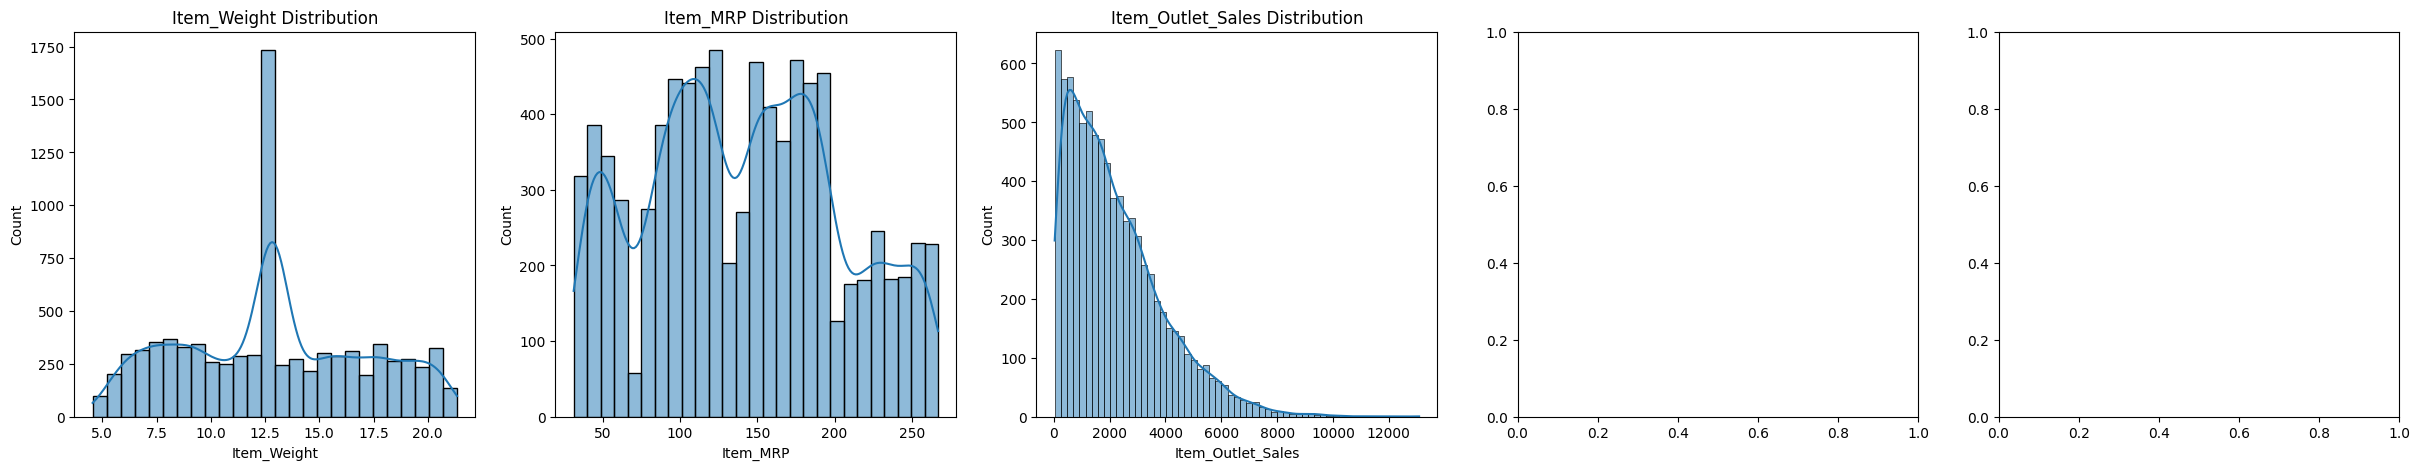

In [10]:
_,ax=plt.subplots(nrows=1,ncols=5,figsize=(30,5))
for i,col in enumerate(numarical):
    sns.histplot(df[col],kde=True,ax=ax[i])
    ax[i].set_title(f"{col} Distribution")

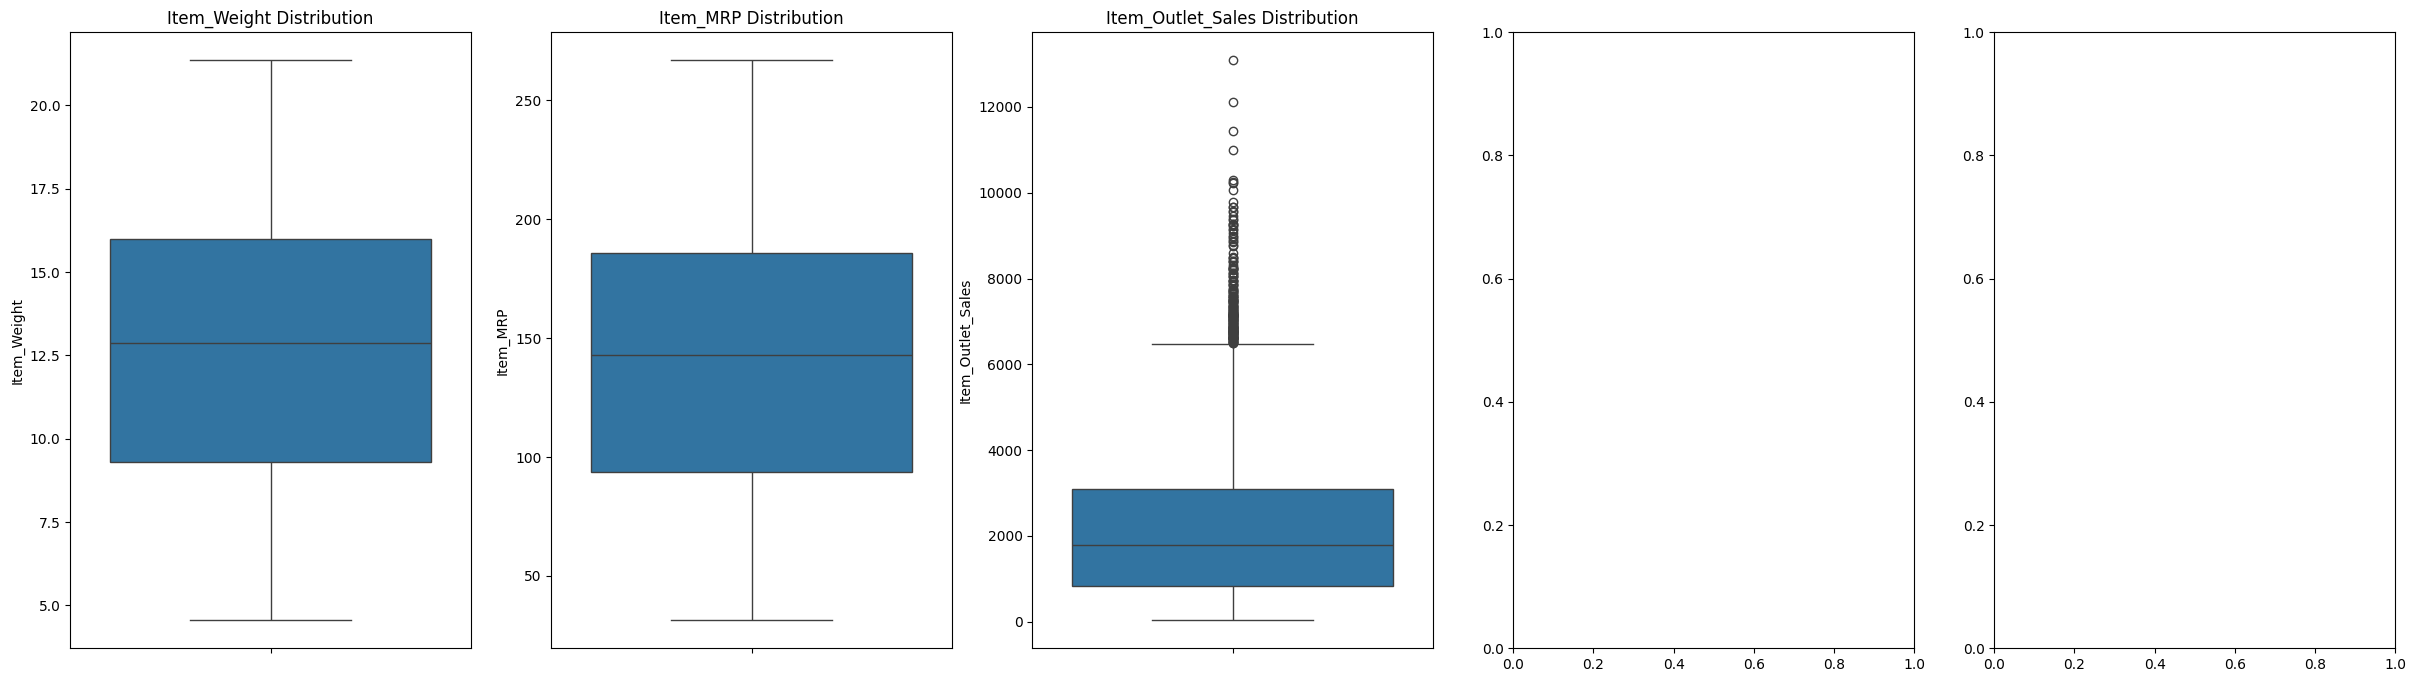

In [11]:
_,ax=plt.subplots(nrows=1,ncols=5,figsize=(30,8))
for i,col in enumerate(numarical):
    sns.boxplot(df[col],ax=ax[i])
    ax[i].set_title(f"{col} Distribution")

C:\Users\USER\AppData\Local\Temp\ipykernel_1676\4035220114.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right", fontsize=18)
C:\Users\USER\AppData\Local\Temp\ipykernel_1676\4035220114.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right", fontsize=18)
C:\Users\USER\AppData\Local\Temp\ipykernel_1676\4035220114.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right", fontsize=18)
C:\Users\USER\AppData\Local\Temp\ipykernel_1676\4035220114.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fixed

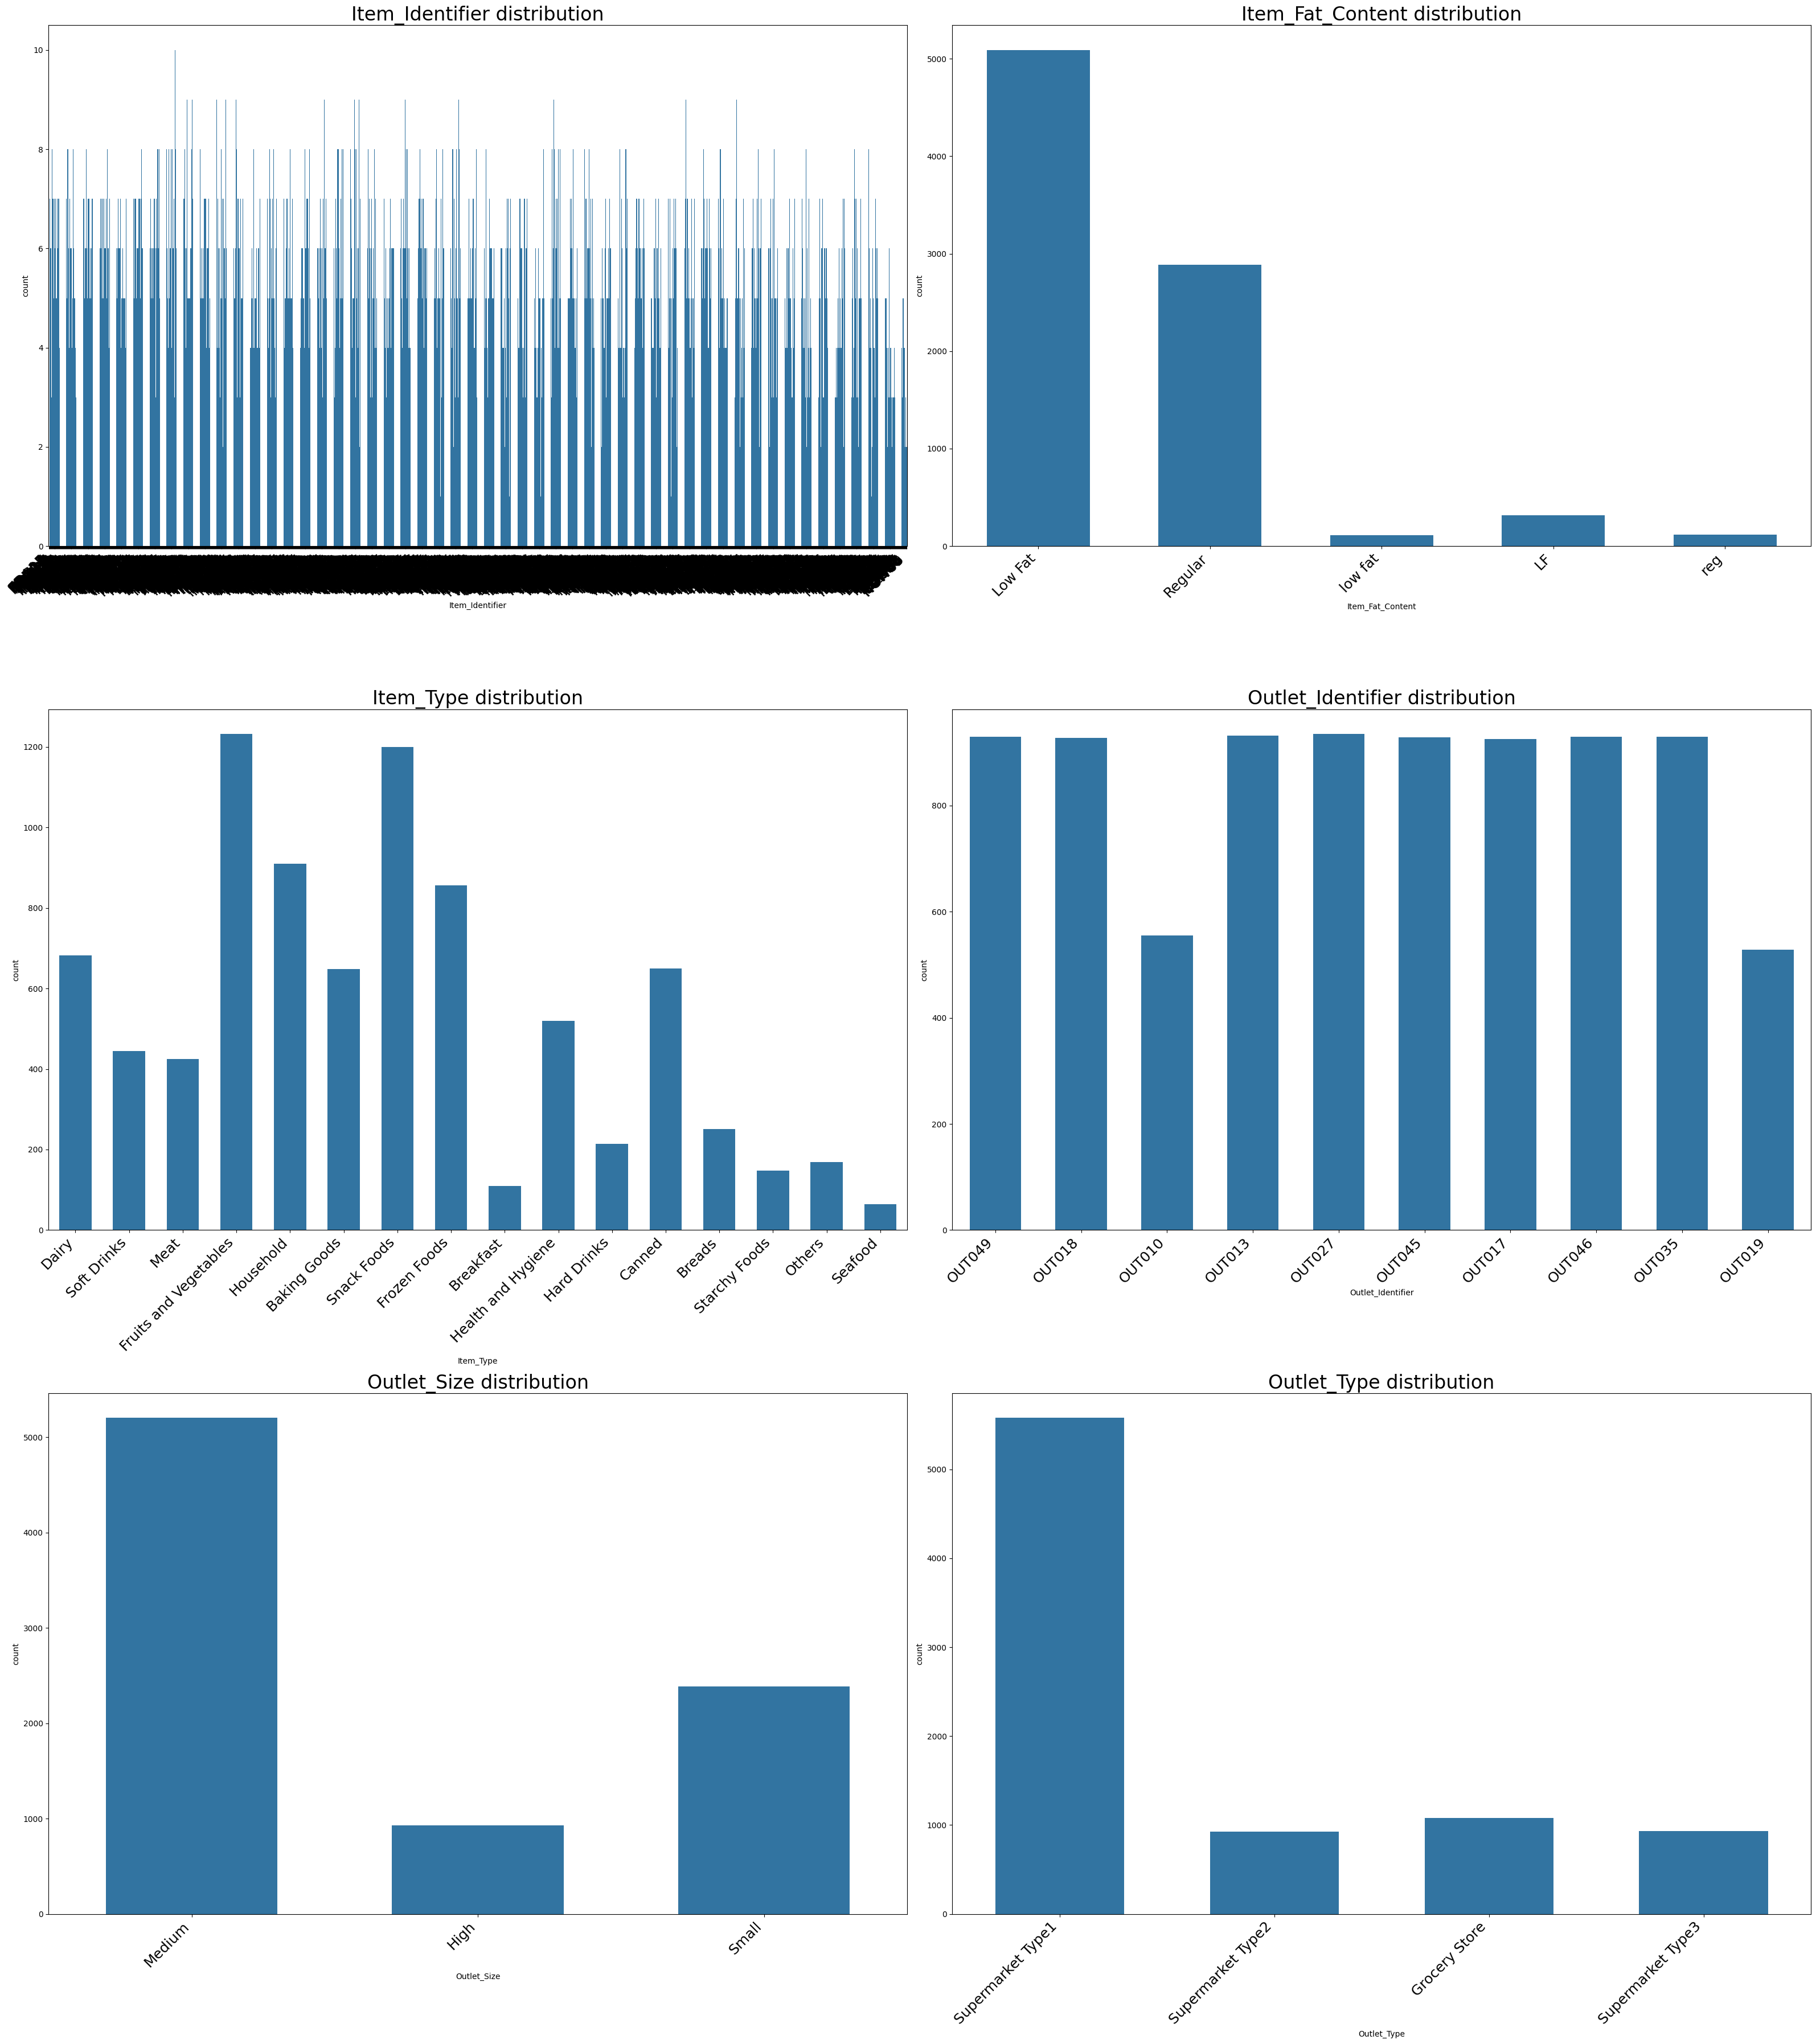

In [12]:
_, ax = plt.subplots(nrows=3, ncols=2, figsize=(32, 36))

for index, col in enumerate(catagorical):
    r = index // 2
    c = index % 2
    g = sns.countplot(data=df, x=col , ax=ax[r][c], width=0.6)
    g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right", fontsize=18)
    ax[r][c].set_title(f'{col} distribution', fontsize=24)
    plt.tight_layout()


In [13]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [14]:
mapping = {
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'Low Fat': 'Low Fat',
    'reg': 'Regular',
    'Regular': 'Regular'
}
df['Item_Fat_Content']=df['Item_Fat_Content'].replace(mapping)
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

C:\Users\USER\AppData\Local\Temp\ipykernel_1676\4035220114.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right", fontsize=18)
C:\Users\USER\AppData\Local\Temp\ipykernel_1676\4035220114.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right", fontsize=18)
C:\Users\USER\AppData\Local\Temp\ipykernel_1676\4035220114.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right", fontsize=18)
C:\Users\USER\AppData\Local\Temp\ipykernel_1676\4035220114.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fixed

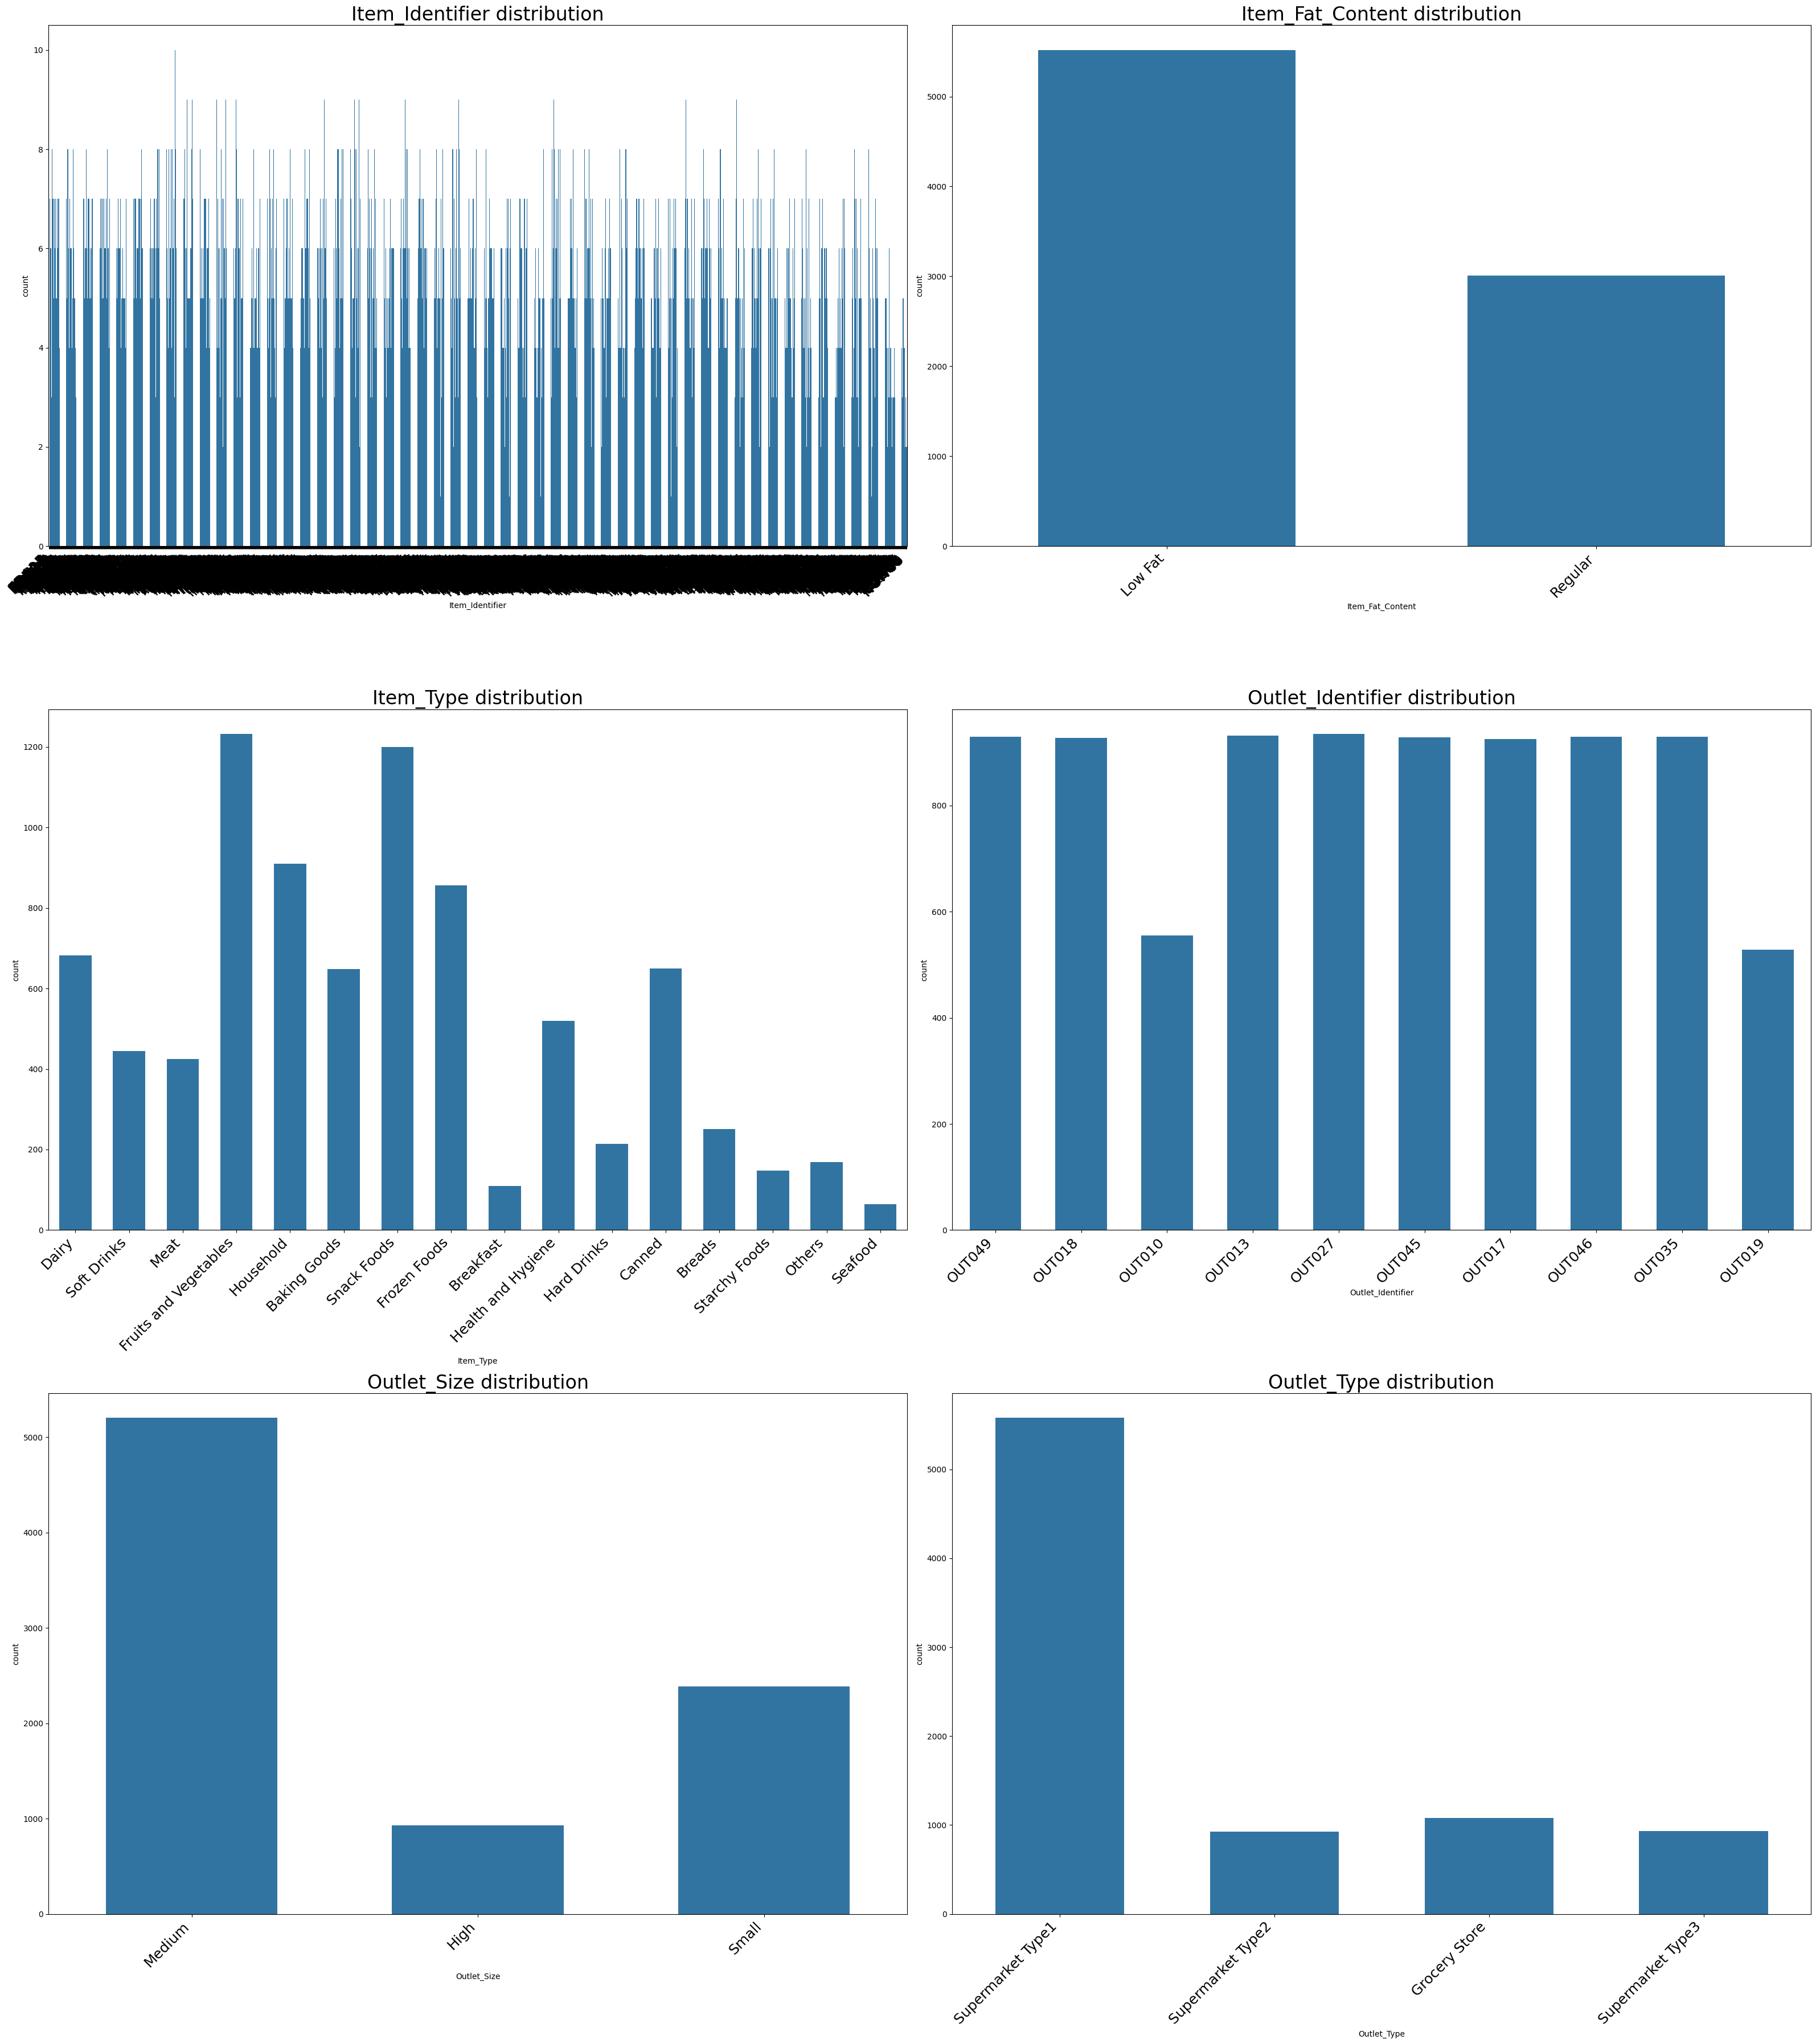

In [15]:
_, ax = plt.subplots(nrows=3, ncols=2, figsize=(32, 36))

for index, col in enumerate(catagorical):
    r = index // 2
    c = index % 2
    g = sns.countplot(data=df, x=col , ax=ax[r][c], width=0.6)
    g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right", fontsize=18)
    ax[r][c].set_title(f'{col} distribution', fontsize=24)
    plt.tight_layout()


In [16]:
df1=pd.get_dummies(df,columns=catagorical)

In [17]:
len(df.Item_Identifier.unique())


1559

In [18]:
df1.head()

,Item_Weight,Item_MRP,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,249.8092,3735.1380,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,True,False,False
1,5.92,48.2692,443.4228,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,17.50,141.6180,2097.2700,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,True,False,False
3,19.20,182.0950,732.3800,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
4,8.93,53.8614,994.7052,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False


In [19]:
x=df.drop(df[['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Type'
 ]],axis=1)
y=df.Item_Outlet_Sales

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=10)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)


1.0

In [21]:
from sklearn.ensemble import RandomForestRegressor
random=RandomForestRegressor(n_estimators=50,criterion='friedman_mse')
random.fit(X_train,y_train)
random.score(X_test,y_test)


0.9995900402988198

In [22]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,X_train,y_train,cv=5).mean()

np.float64(1.0)

In [23]:
import joblib
joblib.dump(model,'model.pkl')

['model.pkl']